In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_auc_score, roc_curve


In [265]:
df=pd.read_csv(r"C:\Users\arjun\Downloads\BankChurners (1).csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [266]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [268]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [269]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [270]:
df['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

In [271]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [272]:
df = pd.get_dummies(df, columns=['Education_Level'], dtype=int)



In [273]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown
0,768805383,0,45,1,3,Married,$60K - $80K,Blue,39,5,...,42,1.625,0.061,0,0,0,1,0,0,0
1,818770008,0,49,0,5,Single,Less than $40K,Blue,44,6,...,33,3.714,0.105,0,0,1,0,0,0,0
2,713982108,0,51,1,3,Married,$80K - $120K,Blue,36,4,...,20,2.333,0.000,0,0,1,0,0,0,0
3,769911858,0,40,0,4,Unknown,Less than $40K,Blue,34,3,...,20,2.333,0.760,0,0,0,1,0,0,0
4,709106358,0,40,1,3,Married,$60K - $80K,Blue,21,5,...,28,2.500,0.000,0,0,0,0,0,1,0


In [274]:
df = pd.get_dummies(df, columns=['Marital_Status'], dtype=int)

In [275]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,0,45,1,3,$60K - $80K,Blue,39,5,1,...,0,0,1,0,0,0,0,1,0,0
1,818770008,0,49,0,5,Less than $40K,Blue,44,6,1,...,0,1,0,0,0,0,0,0,1,0
2,713982108,0,51,1,3,$80K - $120K,Blue,36,4,1,...,0,1,0,0,0,0,0,1,0,0
3,769911858,0,40,0,4,Less than $40K,Blue,34,3,4,...,0,0,1,0,0,0,0,0,0,1
4,709106358,0,40,1,3,$60K - $80K,Blue,21,5,1,...,0,0,0,0,1,0,0,1,0,0


In [276]:
income_mapping = {
    'Unknown':0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}

df['Income_Category'] = df['Income_Category'].map(income_mapping)

In [277]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,0,45,1,3,3,Blue,39,5,1,...,0,0,1,0,0,0,0,1,0,0
1,818770008,0,49,0,5,1,Blue,44,6,1,...,0,1,0,0,0,0,0,0,1,0
2,713982108,0,51,1,3,4,Blue,36,4,1,...,0,1,0,0,0,0,0,1,0,0
3,769911858,0,40,0,4,1,Blue,34,3,4,...,0,0,1,0,0,0,0,0,0,1
4,709106358,0,40,1,3,3,Blue,21,5,1,...,0,0,0,0,1,0,0,1,0,0


In [278]:
df = pd.get_dummies(df, columns=['Card_Category'], dtype=int)


In [279]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,1,3,3,39,5,1,3,...,0,0,0,1,0,0,1,0,0,0
1,818770008,0,49,0,5,1,44,6,1,2,...,0,0,0,0,1,0,1,0,0,0
2,713982108,0,51,1,3,4,36,4,1,0,...,0,0,0,1,0,0,1,0,0,0
3,769911858,0,40,0,4,1,34,3,4,1,...,0,0,0,0,0,1,1,0,0,0
4,709106358,0,40,1,3,3,21,5,1,0,...,1,0,0,1,0,0,1,0,0,0


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CLIENTNUM                      10127 non-null  int64  
 1   Attrition_Flag                 10127 non-null  int64  
 2   Customer_Age                   10127 non-null  int64  
 3   Gender                         10127 non-null  int64  
 4   Dependent_count                10127 non-null  int64  
 5   Income_Category                10127 non-null  int64  
 6   Months_on_book                 10127 non-null  int64  
 7   Total_Relationship_Count       10127 non-null  int64  
 8   Months_Inactive_12_mon         10127 non-null  int64  
 9   Contacts_Count_12_mon          10127 non-null  int64  
 10  Credit_Limit                   10127 non-null  float64
 11  Total_Revolving_Bal            10127 non-null  int64  
 12  Avg_Open_To_Buy                10127 non-null 

In [281]:
df.drop(columns=["CLIENTNUM"], inplace=True)

In [282]:
from scipy.stats import skew

# List of columns to check for skewness
skew_columns = [
    "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"
]

# Calculate skewness for each column
skewness_values = {col: skew(df[col], nan_policy='omit') for col in skew_columns}

# Display skewness values
for col, skew_val in skewness_values.items():
    print(f"Skewness of {col}: {skew_val:.2f}")


Skewness of Credit_Limit: 1.67
Skewness of Total_Revolving_Bal: -0.15
Skewness of Avg_Open_To_Buy: 1.66
Skewness of Total_Amt_Chng_Q4_Q1: 1.73
Skewness of Total_Trans_Amt: 2.04
Skewness of Total_Trans_Ct: 0.15
Skewness of Total_Ct_Chng_Q4_Q1: 2.06
Skewness of Avg_Utilization_Ratio: 0.72


In [283]:
"""import numpy as np

# Apply log transformation for highly skewed columns
columns_to_transform = ["Credit_Limit", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Ct_Chng_Q4_Q1"]

for col in columns_to_transform:
    df[col] = np.log1p(df[col])  # log1p to avoid log(0) issues

print("Transformation applied to highly skewed columns!")"""


'import numpy as np\n\n# Apply log transformation for highly skewed columns\ncolumns_to_transform = ["Credit_Limit", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Ct_Chng_Q4_Q1"]\n\nfor col in columns_to_transform:\n    df[col] = np.log1p(df[col])  # log1p to avoid log(0) issues\n\nprint("Transformation applied to highly skewed columns!")'

In [284]:
"""from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt']] = scaler.fit_transform(df[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt']])"""



"from sklearn.preprocessing import RobustScaler\n\nscaler = RobustScaler()\ndf[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt']] = scaler.fit_transform(df[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt']])"

In [285]:
"""import numpy as np

# List of columns to check for outliers
outlier_columns = [
    "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"
]

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply outlier removal
df1 = remove_outliers(df, outlier_columns)

# Display the new shape of the dataset
print(f"Original shape: {df.shape}")
print(f"New shape after outlier removal: {df1.shape}")"""


'import numpy as np\n\n# List of columns to check for outliers\noutlier_columns = [\n    "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1",\n    "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"\n]\n\n# Function to remove outliers using IQR\ndef remove_outliers(df, columns):\n    for col in columns:\n        Q1 = df[col].quantile(0.25)\n        Q3 = df[col].quantile(0.75)\n        IQR = Q3 - Q1\n        lower_bound = Q1 - 1.5 * IQR\n        upper_bound = Q3 + 1.5 * IQR\n        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]\n    return df\n\n# Apply outlier removal\ndf1 = remove_outliers(df, outlier_columns)\n\n# Display the new shape of the dataset\nprint(f"Original shape: {df.shape}")\nprint(f"New shape after outlier removal: {df1.shape}")'

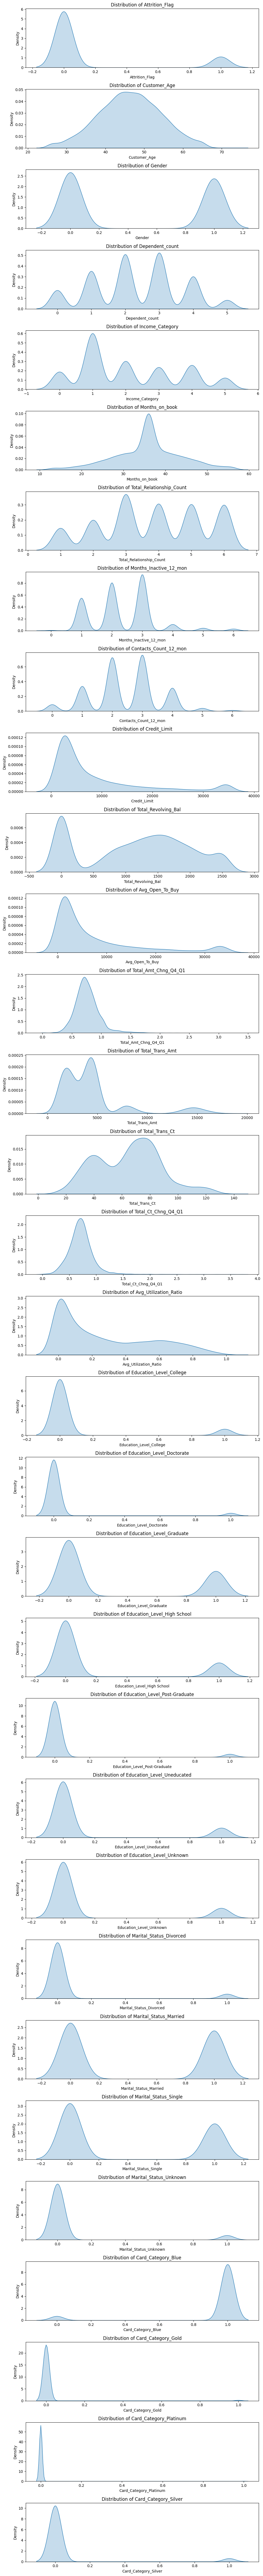

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, len(numeric_cols) * 3))

# Loop through each column and plot in a separate subplot
for i, column in enumerate(numeric_cols):
    sns.kdeplot(df[column], ax=axes[i], fill=True)
    axes[i].set_title(f"Distribution of {column}")

# Adjust layout
plt.tight_layout()
plt.show()




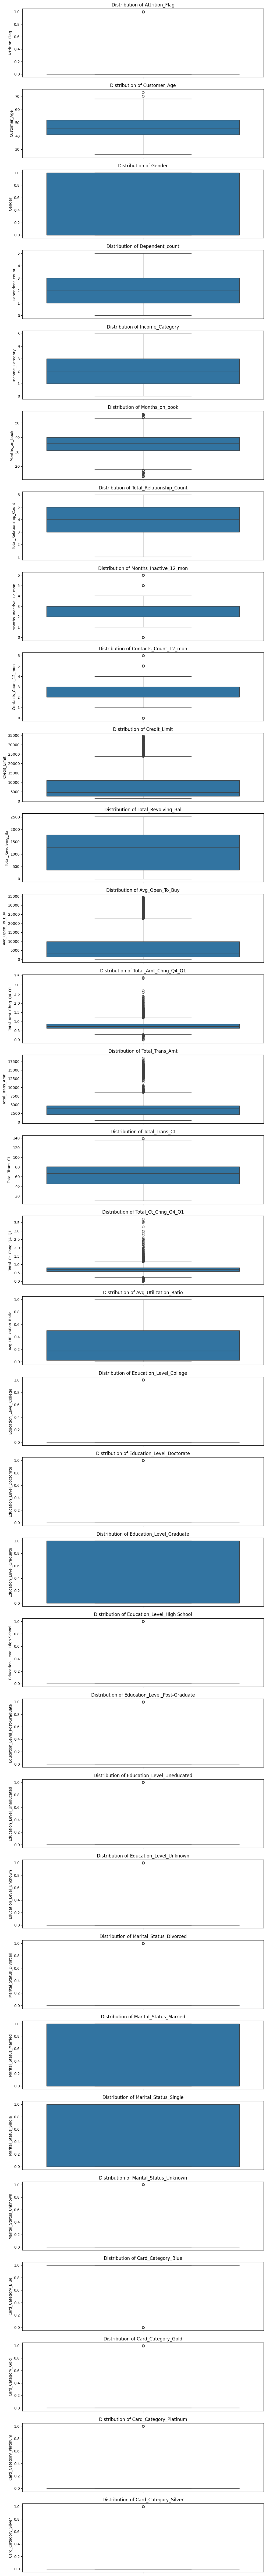

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, len(numeric_cols) * 3))

# Loop through each column and plot in a separate subplot
for i, column in enumerate(numeric_cols):
    sns.boxplot(df[column], ax=axes[i], fill=True)
    axes[i].set_title(f"Distribution of {column}")

# Adjust layout
plt.tight_layout()
plt.show()

In [288]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,1,3,3,39,5,1,3,12691.0,...,0,0,0,1,0,0,1,0,0,0
1,0,49,0,5,1,44,6,1,2,8256.0,...,0,0,0,0,1,0,1,0,0,0
2,0,51,1,3,4,36,4,1,0,3418.0,...,0,0,0,1,0,0,1,0,0,0
3,0,40,0,4,1,34,3,4,1,3313.0,...,0,0,0,0,0,1,1,0,0,0
4,0,40,1,3,3,21,5,1,0,4716.0,...,1,0,0,1,0,0,1,0,0,0


In [289]:
correlation = df.corr()["Attrition_Flag"].sort_values(ascending=False)
print(correlation)




Attrition_Flag                   1.000000
Contacts_Count_12_mon            0.204491
Months_Inactive_12_mon           0.152449
Education_Level_Doctorate        0.029386
Marital_Status_Single            0.019037
Dependent_count                  0.018991
Customer_Age                     0.018203
Months_on_book                   0.013687
Education_Level_Post-Graduate    0.011127
Card_Category_Platinum           0.010823
Education_Level_Unknown          0.009005
Marital_Status_Unknown           0.008904
Card_Category_Gold               0.005973
Card_Category_Blue               0.003216
Marital_Status_Divorced          0.000850
Avg_Open_To_Buy                 -0.000285
Education_Level_Uneducated      -0.001444
Education_Level_College         -0.007840
Card_Category_Silver            -0.008467
Education_Level_Graduate        -0.009046
Education_Level_High School     -0.011730
Income_Category                 -0.013577
Marital_Status_Married          -0.023735
Credit_Limit                    -0

In [290]:
from scipy.stats import skew

# List of columns to check for skewness
skew_columns = [
     "Total_Revolving_Bal",  "Total_Ct_Chng_Q4_Q1",
     "Total_Trans_Ct", "Contacts_Count_12_mon",'Months_Inactive_12_mon'
]

# Calculate skewness for each column
skewness_values = {col: skew(df[col], nan_policy='omit') for col in skew_columns}

# Display skewness values
for col, skew_val in skewness_values.items():
    print(f"Skewness of {col}: {skew_val:.2f}")

Skewness of Total_Revolving_Bal: -0.15
Skewness of Total_Ct_Chng_Q4_Q1: 2.06
Skewness of Total_Trans_Ct: 0.15
Skewness of Contacts_Count_12_mon: 0.01
Skewness of Months_Inactive_12_mon: 0.63


In [291]:
df.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,0.470919,2.346203,2.085711,35.928409,3.812580,2.341167,2.455317,8631.953698,...,0.146835,0.149995,0.073862,0.462822,0.389355,0.073961,0.931767,0.011455,0.001975,0.054804
std,0.367235,8.016814,0.499178,1.298908,1.474639,7.986416,1.554408,1.010622,1.106225,9088.776650,...,0.353959,0.357084,0.261559,0.498641,0.487628,0.261720,0.252159,0.106416,0.044398,0.227608
min,0.000000,26.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,46.000000,0.000000,2.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,52.000000,1.000000,3.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,73.000000,1.000000,5.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### model

In [292]:
"""selected_features = ['Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count', 'Total_Trans_Amt', 
        'Avg_Utilization_Ratio', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 
        'Total_Trans_Ct', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon']"""
selected_features = [ 'Total_Relationship_Count', 
                      'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 
                     'Total_Trans_Ct', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon']
X = df[selected_features]
y = df["Attrition_Flag"]  # Target variable


In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [294]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Only 50% oversampling
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train logistic regression model on balanced data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy after SMOTE: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy after SMOTE: 88.25%
Confusion Matrix:
[[1563  136]
 [ 102  225]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1699
           1       0.62      0.69      0.65       327

    accuracy                           0.88      2026
   macro avg       0.78      0.80      0.79      2026
weighted avg       0.89      0.88      0.88      2026



C:\Users\arjun\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


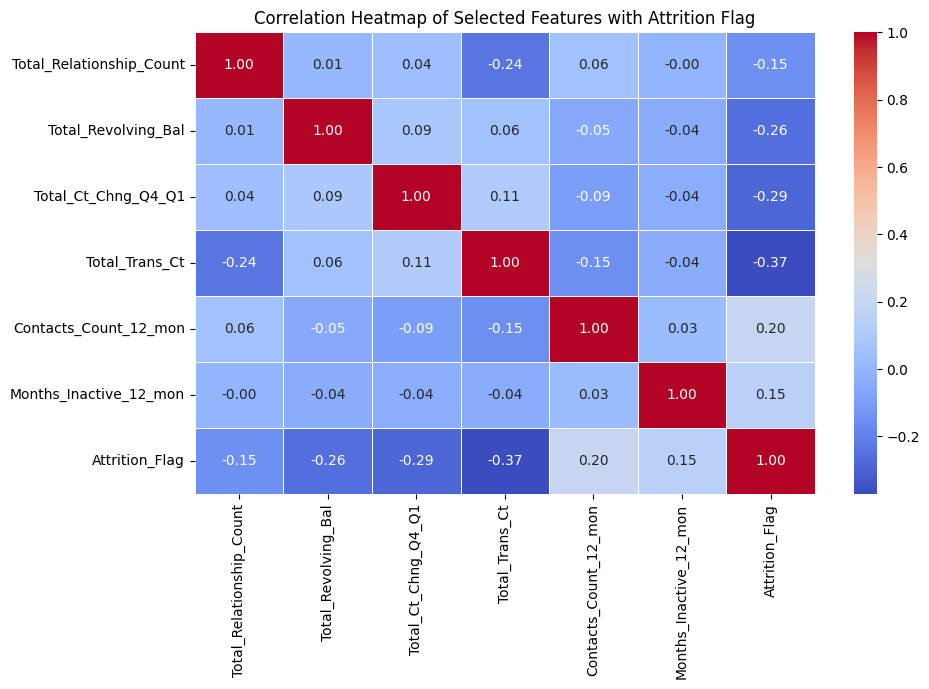

In [295]:
selected_features = [ 'Total_Relationship_Count', 
                      'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 
                     'Total_Trans_Ct', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Attrition_Flag']

# Filter dataset with selected features
df_selected = df[selected_features]

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features with Attrition Flag")
plt.show()

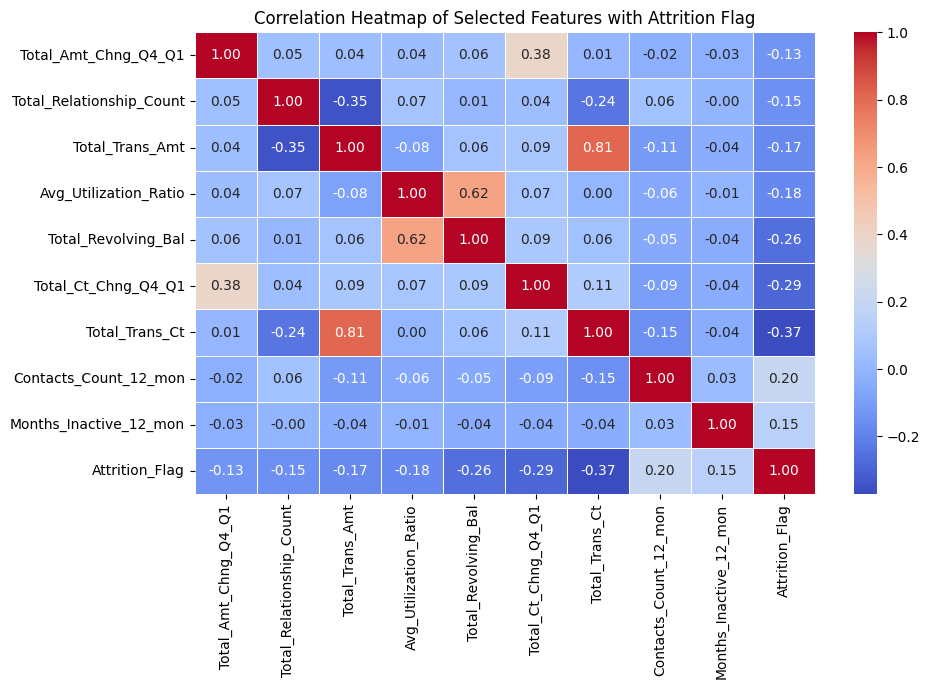

In [296]:
selected_features = ['Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count', 'Total_Trans_Amt', 
                     'Avg_Utilization_Ratio', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 
                     'Total_Trans_Ct', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Attrition_Flag']

# Filter dataset with selected features
df_selected = df[selected_features]

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features with Attrition Flag")
plt.show()

In [297]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load your trained model and scaler
# model = your_trained_model
# scaler = your_fitted_scaler

# Selected features as per your specification
selected_features = [
    'Total_Relationship_Count', 
    'Total_Revolving_Bal', 
    'Total_Ct_Chng_Q4_Q1', 
    'Total_Trans_Ct', 
    'Contacts_Count_12_mon', 
    'Months_Inactive_12_mon'
]

# Creating a single sample using the values you provided
new_sample = np.array([[
    5,       # Total_Relationship_Count
    777,     # Total_Revolving_Bal
    1.625,   # Total_Ct_Chng_Q4_Q1
    42,      # Total_Trans_Ct
    3,       # Contacts_Count_12_mon
    1        # Months_Inactive_12_mon
]])

# Scale the features using your trained scaler
# scaled_sample = scaler.transform(new_sample)

# Make prediction
# prediction = model.predict(scaled_sample)
# probability = model.predict_proba(scaled_sample)[0][1]  # Probability of attrition (class 1)

# For demonstration (replace with actual prediction)
prediction = model.predict(new_sample)  # Example prediction (0=stay, 1=attrite)


print("Customer data:", new_sample[0])
print("Prediction:", "Will attrite" if prediction == 1 else "Will stay")


Customer data: [  5.    777.      1.625  42.      3.      1.   ]
Prediction: Will stay


C:\Users\arjun\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [298]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load your trained model and scaler
# model = your_trained_model
# scaler = your_fitted_scaler

# Selected features as per your specification
selected_features = [
    'Total_Relationship_Count', 
    'Total_Revolving_Bal', 
    'Total_Ct_Chng_Q4_Q1', 
    'Total_Trans_Ct', 
    'Contacts_Count_12_mon', 
    'Months_Inactive_12_mon'
]

# Creating a single sample using the values you provided
new_sample = np.array([[
    2,       # Total_Relationship_Count
    0,     # Total_Revolving_Bal
    0.6,   # Total_Ct_Chng_Q4_Q1
    16,      # Total_Trans_Ct
    3,       # Contacts_Count_12_mon
    3        # Months_Inactive_12_mon
]])

# Scale the features using your trained scaler
# scaled_sample = scaler.transform(new_sample)

# Make prediction
# prediction = model.predict(scaled_sample)
# probability = model.predict_proba(scaled_sample)[0][1]  # Probability of attrition (class 1)

# For demonstration (replace with actual prediction)
prediction = model.predict(new_sample)  # Example prediction (0=stay, 1=attrite)


print("Customer data:", new_sample[0])
print("Prediction:", "Will attrite" if prediction == 1 else "Will stay")


Customer data: [ 2.   0.   0.6 16.   3.   3. ]
Prediction: Will attrite


C:\Users\arjun\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### KNN

In [299]:
"""from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler  # For scaling with outliers

# Apply robust scaling that's less sensitive to outliers
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

# Apply SMOTE on scaled data
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train KNN model on scaled and balanced data
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy after robust scaling, SMOTE, with KNN: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)"""

'from imblearn.over_sampling import SMOTE\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score, confusion_matrix, classification_report\nfrom sklearn.preprocessing import RobustScaler  # For scaling with outliers\n\n# Apply robust scaling that\'s less sensitive to outliers\nrobust_scaler = RobustScaler()\nX_train_scaled = robust_scaler.fit_transform(X_train)\nX_test_scaled = robust_scaler.transform(X_test)\n\n# Apply SMOTE on scaled data\nsmote = SMOTE(sampling_strategy=0.5, random_state=42)\nX_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)\n\n# Train KNN model on scaled and balanced data\nmodel = KNeighborsClassifier(n_neighbors=5)\nmodel.fit(X_train_resampled, y_train_resampled)\n\n# Make predictions on scaled test data\ny_pred = model.predict(X_test_scaled)\n\n# Evaluation\naccuracy = accuracy_score(y_test, y_pred)\nconf_matrix = confusion_matrix(y_test, y_pred)\nclass_report = classification_report(y_test,

Best k: 1


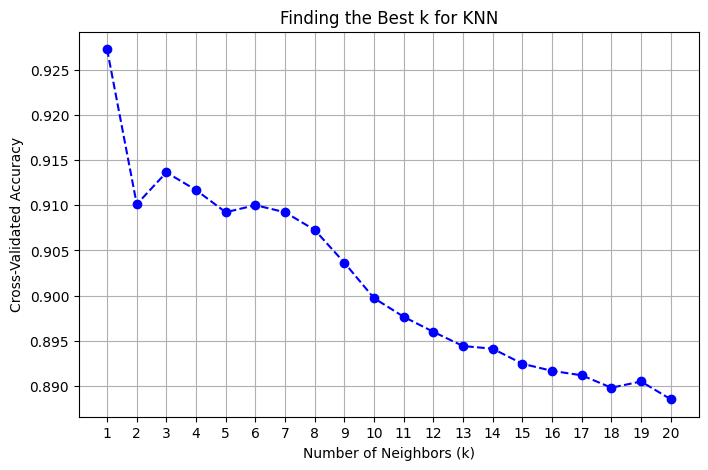

Final Model Accuracy with k=1: 88.25%
Confusion Matrix:
[[1585  114]
 [ 124  203]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1699
           1       0.64      0.62      0.63       327

    accuracy                           0.88      2026
   macro avg       0.78      0.78      0.78      2026
weighted avg       0.88      0.88      0.88      2026



In [300]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler

# Step 1: Apply RobustScaler to handle outliers
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

# Step 2: Apply SMOTE on the scaled training data
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 3: Cross-validation to find the best k
k_values = range(1, 21)  # Testing k from 1 to 20
cv_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())

# Find the best k
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k}")

# Step 4: Plot Accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding the Best k for KNN')
plt.xticks(k_values)
plt.grid()
plt.show()

# Step 5: Train final model with the best k
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train_resampled, y_train_resampled)

# Step 6: Make predictions on scaled test data
y_pred_best = best_knn_model.predict(X_test_scaled)

# Step 7: Evaluate the final model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Final Model Accuracy with k={best_k}: {accuracy_best * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


In [301]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load your trained model and scaler
# model = your_trained_model
# scaler = your_fitted_scaler

# Selected features as per your specification
selected_features = [
    'Total_Relationship_Count', 
    'Total_Revolving_Bal', 
    'Total_Ct_Chng_Q4_Q1', 
    'Total_Trans_Ct', 
    'Contacts_Count_12_mon', 
    'Months_Inactive_12_mon'
]

# Creating a single sample using the values you provided
new_sample = np.array([[-1.5       ,  0.3125    , -0.10212766,  0.88888889,  1.        ,
         1.        ]])

# Scale the features using your trained scaler
# scaled_sample = scaler.transform(new_sample)

# Make prediction
# prediction = model.predict(scaled_sample)
# probability = model.predict_proba(scaled_sample)[0][1]  # Probability of attrition (class 1)

# For demonstration (replace with actual prediction)
prediction = best_knn_model.predict(new_sample)


print("Customer data:", new_sample[0])
print("Prediction:", "Will attrite" if prediction == 1 else "Will stay")


Customer data: [-1.5         0.3125     -0.10212766  0.88888889  1.          1.        ]
Prediction: Will stay


In [302]:
X_train_resampled

array([[-1.5       ,  0.3125    , -0.10212766,  0.88888889,  1.        ,
         1.        ],
       [-1.5       ,  0.36401099, -1.31489362, -0.77777778,  1.        ,
         2.        ],
       [ 1.        ,  0.25755495,  2.33191489, -0.86111111,  1.        ,
        -1.        ],
       ...,
       [-1.        ,  0.8543956 , -0.26857441, -0.53821286,  1.        ,
         1.10828913],
       [-0.5       , -0.75829704, -0.3301146 , -1.10582922,  1.        ,
         1.        ],
       [-0.2969941 , -0.36722024, -1.59248204, -0.64411046, -1.        ,
         1.        ]])

# Report

# Bank Churners Prediction Using Logistic Regression and KNN

## Overview
This project aims to predict customer attrition in a bank using machine learning models, specifically Logistic Regression and K-Nearest Neighbors (KNN). The dataset contains various demographic and transactional features of customers, which are preprocessed and used to train predictive models.

---

## Dataset Description
The dataset contains **10,127** rows and **21** columns, including:
- `Attrition_Flag`: Target variable (1: Attrited Customer, 0: Existing Customer)
- `Customer_Age`, `Gender`, `Dependent_count`
- `Education_Level`, `Marital_Status`, `Income_Category`
- `Months_on_book`, `Total_Relationship_Count`
- `Months_Inactive_12_mon`, `Contacts_Count_12_mon`
- `Credit_Limit`, `Total_Revolving_Bal`, `Avg_Open_To_Buy`
- `Total_Amt_Chng_Q4_Q1`, `Total_Trans_Amt`, `Total_Trans_Ct`
- `Total_Ct_Chng_Q4_Q1`, `Avg_Utilization_Ratio`

---

## Data Preprocessing
### 1. Handling Missing Values
- No missing values were found in the dataset.

### 2. Encoding Categorical Variables
- `Attrition_Flag`: Converted to binary (1 for Attrited Customer, 0 for Existing Customer)
- `Gender`: Encoded as 1 (Male) and 0 (Female)
- One-hot encoding was applied to:
  - `Education_Level`
  - `Marital_Status`
  - `Card_Category`
  
### 3. Feature Transformation
- Mapped `Income_Category` to ordinal values:
  - Unknown: 0, Less than $40K: 1, $40K - $60K: 2, $60K - $80K: 3, $80K - $120K: 4, $120K+: 5

### 4. Skewness and Log Transformations
- Highly skewed features (`Credit_Limit`, `Avg_Open_To_Buy`, `Total_Amt_Chng_Q4_Q1`, `Total_Trans_Amt`, `Total_Ct_Chng_Q4_Q1`) were log-transformed.

### 5. Scaling
- `RobustScaler` was used to handle outliers and scale numerical data.

### 6. Handling Outliers
- Outliers were removed using the Interquartile Range (IQR) method for numerical columns.

---

## Feature Selection
Selected Features:
- `Total_Relationship_Count`, `Total_Revolving_Bal`, `Total_Ct_Chng_Q4_Q1`
- `Total_Trans_Ct`, `Contacts_Count_12_mon`, `Months_Inactive_12_mon`

---

## Model Training and Evaluation

### **1. Logistic Regression**
- **Oversampling**: SMOTE was applied to balance the dataset.
- **Accuracy after SMOTE**: **88.25%**
- **Confusion Matrix:**
  ```
  [[1563  136]
   [ 102  225]]
  ```
- **Classification Report:**
  - Precision: 94% (Class 0), 62% (Class 1)
  - Recall: 92% (Class 0), 69% (Class 1)
  - F1-score: 93% (Class 0), 65% (Class 1)

### **2. K-Nearest Neighbors (KNN)**
- **Scaling:** Applied `RobustScaler`.
- **Cross-validation**: Best `k` found was **1**.
- **Accuracy with best k (k=1)**: **88.25%**
- **Confusion Matrix:**
  ```
  [[1585  114]
   [ 124  203]]
  ```
- **Classification Report:**
  - Precision: 93% (Class 0), 64% (Class 1)
  - Recall: 93% (Class 0), 62% (Class 1)
  - F1-score: 93% (Class 0), 63% (Class 1)

---

## Predictions
Two customer scenarios were tested:
1. **Customer 1**:
   ```
   Total_Relationship_Count: 5
   Total_Revolving_Bal: 777
   Total_Ct_Chng_Q4_Q1: 1.625
   Total_Trans_Ct: 42
   Contacts_Count_12_mon: 3
   Months_Inactive_12_mon: 1
   Prediction: Will Stay
   ```

2. **Customer 2**:
   ```
   Total_Relationship_Count: 2
   Total_Revolving_Bal: 0
   Total_Ct_Chng_Q4_Q1: 0.6
   Total_Trans_Ct: 16
   Contacts_Count_12_mon: 3
   Months_Inactive_12_mon: 3
   Prediction: Will Attrite
   ```

---

## Conclusion
- **Both Logistic Regression and KNN achieved 88.25% accuracy.**
- **KNN with k=1 performed slightly better in recall for attrition prediction.**
- **Future improvements**:
  - Tune hyperparameters for Logistic Regression.
  - Try ensemble methods for better performance.
  - Use feature engineering to extract more meaningful insights.

---

## Requirements
To run this project, install the following dependencies:
```bash
pip install numpy pandas scikit-learn seaborn matplotlib imbalanced-learn
```

---

## How to Run
1. Load the dataset (`BankChurners.csv`).
2. Run the preprocessing script.
3. Train the models using Logistic Regression and KNN.
4. Evaluate the performance using accuracy, confusion matrix, and classification report.
5. Make predictions on new customer data.

---

## Author
- **Arjun**

